In [172]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
import os

tfd = tfp.distributions
tfb = tfp.bijectors

print('tensorflow: ', tf.__version__)
print('tensorflow-probability: ', tfp.__version__)

print(type(tfd))

tensorflow:  2.2.0-rc2
tensorflow-probability:  0.9.0
<class 'module'>


In [0]:
target_dist = tfd.Normal(loc=10., scale=5.)

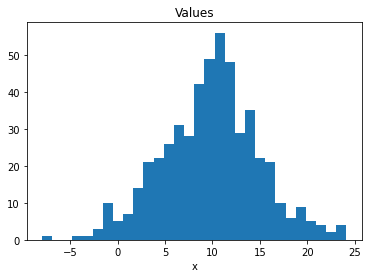

In [186]:
samples = 512
target_samples = target_dist.sample(samples)

plt.hist(target_samples, bins=30)
plt.title('Values')
plt.xlabel('x')
plt.show()

In [0]:
base_dist = tfd.Normal(loc=0., scale=1.)

In [0]:
def forward(x, sigma, mu):
        return x * sigma + mu

In [0]:
x_samples = base_dist.sample(1000)
y_samples = forward(x_samples,10,5)

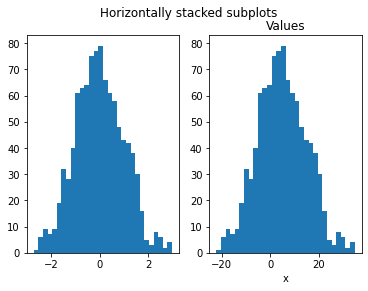

In [193]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.hist(x_samples, bins=30)
ax2.hist(y_samples, bins=30)
plt.title('Values')
plt.xlabel('x')
plt.show()

In [0]:
class ScaleAndShift(tfb.Bijector):
    def __init__(
        self, mu=0.0, sigma=0.0, name = "SAS"):
        super(ScaleAndShift, self).__init__(
            forward_min_event_ndims=0
        ) 
        self.mu = tf.Variable(mu)
        self.sigma = tf.Variable(sigma)

    def _forward(self, x):
        return x * self.sigma + self.mu

    def _inverse(self, y):
        return (y - self.mu) / self.sigma

    def _forward_log_det_jacobian(self, x):
        return tf.math.log(self.sigma)

    def _inverse_log_det_jacobian(self, y):
        return -self._forward_log_det_jacobian(self._inverse)

In [195]:
flow.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)

In [0]:
mu = 10.
sigma = 5.
flow = tfd.TransformedDistribution(
    distribution=base_dist,
    bijector=ScaleAndShift(mu,sigma)
)

In [0]:
samples = flow.sample(100)

In [198]:
samples

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([14.929456 , 17.917053 ,  8.784349 ,  9.886037 , 11.857322 ,
       10.686563 ,  8.196699 , 13.098691 , 18.171791 , 11.356592 ,
       11.646851 , 14.516755 , 10.44997  ,  6.6656876,  9.345794 ,
        5.776679 ,  2.9360409,  3.373228 , 11.228735 ,  5.136765 ,
        7.308134 , 11.9695   , 18.211483 ,  9.262958 ,  9.220659 ,
       13.195953 ,  5.094659 , 13.7744255, 13.966337 , 11.886994 ,
       15.547244 ,  8.2387905,  9.111947 , 11.839856 , 11.498459 ,
        5.280225 , 13.739067 , 19.517738 ,  7.5635357, 11.977386 ,
        9.127735 , 14.750052 ,  3.309176 ,  8.734244 ,  1.6567364,
       15.167282 ,  6.2200036,  7.222101 ,  8.569493 ,  7.8500504,
       13.530845 , 13.338967 , 10.859578 ,  8.716095 , 15.613031 ,
       11.781448 ,  6.9610553, 13.981207 ,  7.9985857,  7.8403296,
        5.0010524,  1.5907755,  7.934286 , 18.11919  ,  2.994032 ,
       11.482359 , 14.621969 , 12.624559 , 16.195831 ,  4.7729063,
        0.5481

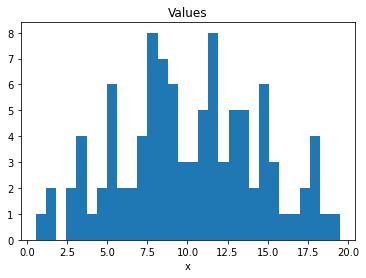

In [199]:
plt.hist(samples, bins=30)
plt.title('Values')
plt.xlabel('x')
plt.show()

In [200]:
flow.trainable_variables


(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)

In [201]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [202]:
tf.executing_eagerly()

True

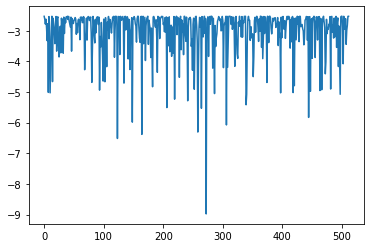

In [203]:
plt.plot(flow.log_prob(target_samples))

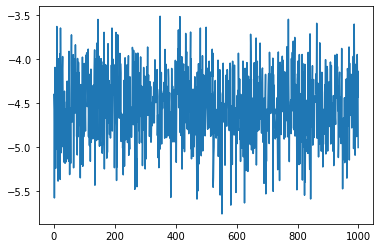

In [204]:
plt.plot(flow.log_prob(x_samples))

In [205]:
losses = []

def loss():
    loss = -tf.reduce_mean(flow.log_prob(target_samples))
    losses.append(loss)
    return loss

optimizer = tf.optimizers.Adam(learning_rate=0.2)

checkpoint = tf.train.Checkpoint(
    model=flow, optimizer=optimizer, optimizer_step=optimizer.iterations
)
checkpoint.restore(tf.train.latest_checkpoint("checkpoints"))

for i in range(10000):
    optimizer.minimize(loss, var_list=flow.trainable_variables)
    if i % 100 == 0:
        checkpoint.save(os.path.join("checkpoints", "ckpt"))
print(flow.trainable_variables)

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=9.842745>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.057694>)


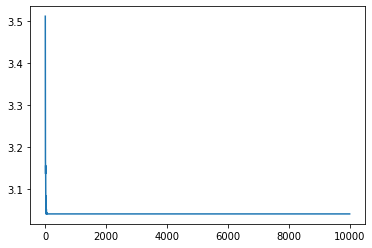

In [206]:
plt.plot(losses)

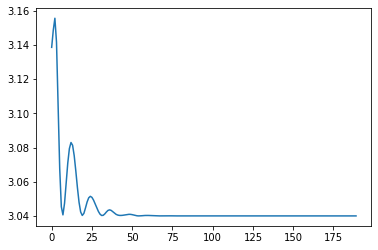

In [207]:
plt.plot(losses[10:200])
